# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

Álvaro Chavarri, Daniel Ojeda, Carlos Vega y Lucía Gálvez

In [1]:
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [2]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
valor_min = 0
valor_max = 255
valores_color = 3
num_colores = 100
# creamos la matriz
datos = np.random.randint(valor_min, valor_max, (valores_color, num_colores))

## SOM Setup
#### Variables definidas por el alumno

In [3]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 20
periodo = 10000
learning_rate = 0.02 
normalizar_datos = 'true'

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [4]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = len(datos)
num_datos = len(datos[0])

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa/2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos == 'true':
    datosN = (datos-np.amin(datos))/(np.amax(datos)-(np.amin(datos)))
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
m_pesos = np.random.random((lado_mapa, lado_mapa, valores_color))

#### Funciones para entrenar/clasificar

In [5]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, num_entradas):
    #inicializamos la distancia minina
    dMin = np.iinfo(np.int).max
    #recorremos la matriz de pesos
    for x in range (m_pesos.shape[0]): #para x
        for y in range (m_pesos.shape[1]): #para y
            w = m_pesos[x, y] #vector de pesos
            dEuclidea = np.linalg.norm(x-y) #distancia Euclidea
            if dEuclidea < dMin:
                dMin = dEuclidea
                bmu_idx = np.array([x, y])
    #vector de pesos de la neurona ganadora
    bmu = m_pesos[bmu_idx[0], bmu_idx[1]]
    return (bmu, bmu_idx)


In [6]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(learning_rate, i, periodo):
    learning_rateV = learning_rate * (1-(i/periodo))
    return learning_rateV

In [7]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario, i, periodo):
    lvecindario = 1 + vecindario * (1-(i/periodo))
    return lvecindario

In [8]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

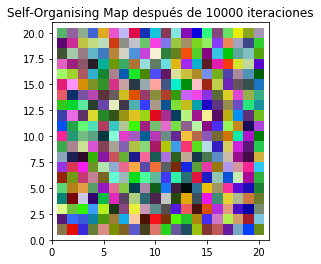

In [9]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, m_pesos.shape[0]+1))
    ax.set_ylim((0, m_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % periodo)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()
    
pintar_mapa(m_pesos)

## SOM Entrenamiento

In [11]:
# Entrena la red con el dataset de entrenamiento
for i in range(periodo):
    patron_entrada = datosN[np.random.randint(datos.shape[0])] #el patron de entrada es escogido al azar
    #calculamos la BMU
    bmu, bmu_idx = calcular_bmu(patron_entrada, m_pesos, num_entradas)
    #calculamos eta y el vecindario
    eta = variacion_learning_rate(learning_rate, i, periodo)
    v = variacion_vecindario(vecindario, i, periodo)
    
    #actualizamos el vector de pesos y así nos acercamos a v
    for x in range(lado_mapa):
        for y in range(lado_mapa):
            w = m_pesos[x, y] #actualizamos el vector de pesos
            #calculamos la distancia euclídea para cada neurona y acercarnos a la correspondiente
            distEuclidea = np.linalg.norm(x-y)
            if distEuclidea <= vecindario: #si la distancia euclidea es menor o igual que el vecindario
                #calculamos la amortigüación 
                amortiguacion = decay(distEuclidea, v)
                #actualizamos el vector de pesos de la neurona
                m_pesos[x, y] = w + eta * amortiguacion * (patron_entrada - w)

m_pesos
pintar_mapa(m_pesos)

ValueError: operands could not be broadcast together with shapes (100,) (3,) 

## SOM Clasificación

In [ ]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [ ]:
# Clasifica nuevos patrones

